# Energetics and Speed of Northwest Atlantic
## Introduction
<div class="alert alert-block alert-info">
<b>The purpose of this notebook is to:</b>
    <li>Read in geostrophic velocity data from Copernicus Marine Environment Monitoring Survey's (CMEMS) site</li>
    <li>Create regional masks for the Slope Sea, Gulf Stream, and Sargasso Sea based on the time-varying Gulf Stream monthly mean path</li>
    <li>Compute the time-varying area of the regional masks</li>
    <li>Compute the eddy kinetic energy (EKE), kinetic energy (KE), and speed in the Northwest Atlantic</li>
    <li>Plot the spatial maps of the EKE, KE, and speed</li>
    <li>Plot the time series of the monthly mean and annual mean EKE, KE, and speed</li>
</div>

### Datasets: 
<a href="https://data.marine.copernicus.eu/product/SEALEVEL_GLO_PHY_L4_MY_008_047/services">Global Ocean Gridded L 4 Sea Surface Heights And Derived Variables Reprocessed 1993 Ongoing</a> <br>
The primary dataset used in this notebook is the eastward, u, and northward, v, geostrophic velocities from CMEMS (<a href="https://data.marine.copernicus.eu/product/SEALEVEL_GLO_PHY_L4_MY_008_047/files?subdataset=cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1D_202112">cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1D</a>). 

### Methods
To compute EKE, KE, and speed use equations 1–3 below. Where:
  <li> $u_t, v_t$ = monthly mean geostrophic velocity </li>
  <li> $\overline{u_c}, \overline{v_c}$ = climatological mean geostrophic velocity (1993–2017) </li>
  <li> $\bigr[(u_t − \overline{u_c})^2\bigr]$ = eastward geostrophic velocity anomaly </li>
  <li> $\bigr[(v_t − \overline{v_c})^2\bigr]$ = northward geostrophic velocity anomaly </li>
  <li> $\rho_0$ = reference density, 1025 $\frac{kg}{m^3}$</li>

(1) $EKE = \frac{1}{2}\rho_0\bigr[(u_t − \overline{u_c})^2 + (v_t − \overline{v_c})^2\bigr]$ <br>

(2) $KE= \frac{1}{2}\rho_0\overline{\bigr(u_t^2 + v_t^2\bigr)}$ <br>

(3) $Speed = \sqrt{u+t^2 +v_t^2}$ <br>



<div class="alert alert-block alert-info">
<b>The goal of this work is to:</b>
    <li>Understand the observed EKE, KE, and speed in the Northwest Atlantic (1993–2017)</li>
    <li>Explore the temporal and spatial variability of the EKE, KE, and speed in the Northwest Atlantic</li>
</div>

## Import Functions:

In [1]:
%%time
# this cell takes about 2 seconds to run
# adds upper level to working directory
import sys
sys.path.append("..")

# import the util functions
from utils.eke_data_utils import *
from utils.eke_plot_utils import *
from utils.ring_data_utils import * # import some functions from rings notebook

CPU times: user 2.56 s, sys: 1.1 s, total: 3.66 s
Wall time: 8.86 s


### Pre-Process Data:

<div class="alert alert-block alert-danger">
<b>Note:</b> Only run for the first time to create and save the Data Arrays! If the Data Arrays already exist, do not run the next cell; proceed to the "Load Data" cell.
</div>

In [2]:
%time
# in total, this cell takes a few seconds to run

## !!! only uncomment if the masks and geostrophic velocity file haven't been created and saved !!!
# create_masks(); # create masks based on lat/lon boundaries AND regional masks based GS as moving boundary

## !!! only uncomment if regional area (Slope Sea, Gulf Stream, Sargasso Sea) hasn't been calculated and saved !!!
# calc_area_regions();

## !!! only uncomment if geostrophic velocity anomalies (EKE, KE, speed) hasn't been calculated and saved yet !!!
# geo_vels_anom();

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 2.15 µs


## Load Data:

In [2]:
%time
# this cell takes about 15 ms to run
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"                    Monthly Geostrophic Velocities for the Northwest Atlantic (1993–2017)                "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

geo_vels = xr.open_dataset('/Users/elenaperez/Desktop/rings/data/xr_dataarrays/geo_vels_proc.nc')


"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"              Monthly Geostrophic Velocity Anomalies for the Northwest Atlantic (1993–2017)              "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

ga = xr.open_dataset('/Users/elenaperez/Desktop/rings/data/xr_dataarrays/geo_vels_anom.nc')


"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"                           Bathymetry for the Northwest Atlantic (24N–53N, 82W–48W)                      "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

bathy = xr.open_dataset('/Users/elenaperez/Desktop/rings/data/nwa_bathy.nc')
# regrid bathy file into grid like the geostrophic velocity file
bathy = bathy.z.interp(lat=geo_vels.latitude).interp(lon=geo_vels.longitude)
bathy_nwa = xr.open_dataset('/Users/elenaperez/Desktop/rings/data/nwa_bathy.nc') # open one for plotting


"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"                             WCR Census subset by META2.0 resolution (1993-2017)                         "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

ringCensus_zone_wcr_yyyy_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/ringCensus_zone_wcr_yyyy_formations.pkl')
ringCensus_zone_wcr_yyyy_mm_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/ringCensus_zone_wcr_yyyy_mm_formations.pkl')

  
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"                            Masks of the Northwest Atlantic (regional, zonal)                            "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

mask_bathy = xr.open_dataset('/Users/elenaperez/Desktop/rings/data/xr_dataarrays/masks/mask_bathy.nc')

mask_75_west = np.load('/Users/elenaperez/Desktop/rings/data/np_arrays/masks/mask_75_west.npy')
mask_55_east = np.load('/Users/elenaperez/Desktop/rings/data/np_arrays/masks/mask_55_east.npy')

mask_zone1 = np.load('/Users/elenaperez/Desktop/rings/data/np_arrays/masks/mask_zone1.npy')
mask_zone2 = np.load('/Users/elenaperez/Desktop/rings/data/np_arrays/masks/mask_zone2.npy')
mask_zone3 = np.load('/Users/elenaperez/Desktop/rings/data/np_arrays/masks/mask_zone3.npy')
mask_zone4 = np.load('/Users/elenaperez/Desktop/rings/data/np_arrays/masks/mask_zone4.npy')

mask_NWA = xr.open_dataarray('/Users/elenaperez/Desktop/rings/data/xr_dataarrays/masks/mask_NWA.nc') 



CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.05 µs


## Calculate area:

In [3]:
%time
# this cell takes about 8 microseconds to run

"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"                            Calculate Areas of the Northwest Atlantic Regions                            "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
######################## CREATE GRID OF SPHERICAL EARTH ############################
boxlo,boxla=np.array(np.meshgrid(geo_vels.longitude,geo_vels.latitude))
grid=np.cos(np.radians(abs(boxla)))*(111.1*111.1*0.25*0.25)


################################## SLOPE SEA #######################################
regionMask = 'mask_slope'
slopeArea_monthly = ((grid*geo_vels[regionMask]).sum(("longitude", "latitude"))  / 1000)
slopeArea_annual = ((grid*geo_vels[regionMask]).sum(("longitude", "latitude"))  / 1000).resample(time='1Y').mean()


################################ GULF STREAM ########################################
regionMask = 'mask_gs'
gsArea_monthly = ((grid*geo_vels[regionMask]).sum(("longitude", "latitude"))  / 1000)
gsArea_annual = ((grid*geo_vels[regionMask]).sum(("longitude", "latitude"))  / 1000).resample(time='1Y').mean()


################################ SARGASSO SEA ######################################
regionMask = 'mask_sag'
sagArea_monthly = ((grid*geo_vels[regionMask]).sum(("longitude", "latitude"))  / 1000)
sagArea_annual = ((grid*geo_vels[regionMask]).sum(("longitude", "latitude"))  / 1000).resample(time='1Y').mean()


############################ NORTHWEST ATLANTIC ####################################
nwaArea = ((grid*mask_NWA).sum(("longitude", "latitude"))  / 1000)



CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 7.87 µs


## Spatial Averages:

In [4]:
%time
# this cell takes about 7 microseconds to run

"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"                  Calculate Spatial Averages of EKE the Northwest Atlantic Regions                       "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
# area-weighted spatial average of EKE is sum of monthly or annual EKE divided by monthly or annual area, respectively
################################## SLOPE SEA #######################################
slope_monthly_eke_ts = (ga['EKE_slope'].sum(("longitude", "latitude")))/slopeArea_monthly
slope_annual_eke_ts = (ga['EKE_slope'].sum(("longitude", "latitude")).resample(time = "1Y").mean())/slopeArea_annual


################################ GULF STREAM ########################################
gs_monthly_eke_ts = (ga['EKE_gs'].sum(("longitude", "latitude")))/gsArea_monthly
gs_annual_eke_ts = (ga['EKE_gs'].sum(("longitude", "latitude")).resample(time = "1Y").mean())/gsArea_annual


################################ SARGASSO SEA ######################################
sag_monthly_eke_ts = (ga['EKE_sag'].sum(("longitude", "latitude")))/sagArea_monthly
sag_annual_eke_ts = (ga['EKE_sag'].sum(("longitude", "latitude")).resample(time = "1Y").mean())/sagArea_annual


############################ NORTHWEST ATLANTIC ####################################
nwa_monthly_eke_ts = (ga['EKE_NWA'].sum(("longitude", "latitude")))/nwaArea
nwa_annual_eke_ts = (ga['EKE_NWA'].sum(("longitude", "latitude")).resample(time = "1Y").mean())/nwaArea


"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"                  Calculate Spatial Averages of KE the Northwest Atlantic Regions                       "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
# same as above, but for KE
################################## SLOPE SEA #######################################
slope_monthly_ke_ts = (ga['KE_slope'].sum(("longitude", "latitude")))/slopeArea_monthly
slope_annual_ke_ts = (ga['KE_slope'].sum(("longitude", "latitude")).resample(time = "1Y").mean())/slopeArea_annual


################################ GULF STREAM ########################################
gs_monthly_ke_ts = (ga['KE_gs'].sum(("longitude", "latitude")))/gsArea_monthly
gs_annual_ke_ts = (ga['KE_gs'].sum(("longitude", "latitude")).resample(time = "1Y").mean())/gsArea_annual


################################ SARGASSO SEA ######################################
sag_monthly_ke_ts = (ga['KE_sag'].sum(("longitude", "latitude")))/sagArea_monthly
sag_annual_ke_ts = (ga['KE_sag'].sum(("longitude", "latitude")).resample(time = "1Y").mean())/sagArea_annual

############################ NORTHWEST ATLANTIC ####################################
nwa_monthly_ke_ts = (ga['KE_NWA'].sum(("longitude", "latitude")))/nwaArea
nwa_annual_ke_ts = (ga['KE_NWA'].sum(("longitude", "latitude")).resample(time = "1Y").mean())/nwaArea




CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 9.06 µs


## Pre/post 2000:
From an analysis of the EKE timeseries, the regime shift detection algorithm (described in better detail in rings_notebook) detected a regime shift in almost all EKE timeseries around 2000. Hence why the spatial plots are shown in three panels: pre-2000, post-2000, and the difference (post-2000 minus pre-2000).

In [5]:
%time
# this cell takes about 10 microseconds to run

"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"                  Split DataArrays into pre-2000 and post-2000 for easier plotting                       "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
# pre-2000 = 1993-1999
# post-2000 = 2000–2017

################################## KINETIC ENERGY #######################################
ga["KE_pre2000"] = ga['KE'].sel(time = slice(None, "2000")).mean("time")
ga["KE_post2000"] = ga['KE'].sel(time = slice("2000", None)).mean("time")


##################################### SPEED #############################################

ga["speed_pre2000"] = ga['speed'].sel(time = slice(None, "2000")).mean("time")
ga["speed_post2000"] = ga['speed'].sel(time = slice("2000", None)).mean("time")


############################## EDDY KINETIC ENERGY ######################################

ga["EKE_pre2000"] = ga['EKE'].sel(time = slice(None, "2000")).mean("time")
ga["EKE_post2000"] = ga['EKE'].sel(time = slice("2000", None)).mean("time")



CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.2 µs


In [6]:
%time
# this cell takes about 268 microseconds to run 
# uncomment the 1st and 3rd blocks of code to export EKE timeseries to CSVs for regime shift detection
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"                 Export annual EKE timeseries to CSV for regime shift analysis                           "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
# nwa_annual_eke_ts.to_dataframe('nwa_eke').to_csv('/Users/elenaperez/Desktop/rings/data/csv/annual_NWA_EKE.csv')
# gs_annual_eke_ts.to_dataframe('gs_eke').to_csv('/Users/elenaperez/Desktop/rings/data/csv/annual_GS_EKE.csv')
# slope_annual_eke_ts.to_dataframe('slope_eke').to_csv('/Users/elenaperez/Desktop/rings/data/csv/annual_slope_EKE.csv')
# sag_annual_eke_ts.to_dataframe('sag_eke').to_csv('/Users/elenaperez/Desktop/rings/data/csv/annual_sag_EKE.csv')

"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
""""""" ANNUAL EKE TIMESERIES REGIME SHIFT ANALYSIS                                                             "
""""""" For more details on regime shift analysis, see rings_notebook                                           "
"""""""                                                                                                         "
""""""" NWA annual EKE --> 1 regime shift detected at 2000, statistically signifcant (p-val = 0.001039419)      "
""""""" Gulf Stream annual EKE --> no regime shifts detected                                                    "
""""""" Slope annual EKE --> 2 regime shifts detected (2000, 2005), 1 significant at 2000 (p-val = 0.002960056) "
""""""" Sargasso annual EKE --> no regime shifts detected                                                       "
"""""""                                                                                                         "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""



"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"                 Export monthly EKE timeseries to CSV for regime shift analysis                          "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
# nwa_monthly_eke_ts.to_dataframe('nwa_eke_monthly').to_csv('/Users/elenaperez/Desktop/rings/data/csv/monthly_NWA_EKE.csv')
# gs_monthly_eke_ts.to_dataframe('gs_eke_monthly').to_csv('/Users/elenaperez/Desktop/rings/data/csv/monthly_GS_EKE.csv')
# slope_monthly_eke_ts.to_dataframe('slope_eke_monthly').to_csv('/Users/elenaperez/Desktop/rings/data/csv/monthly_slope_EKE.csv')
# sag_monthly_eke_ts.to_dataframe('sag_eke_monthly').to_csv('/Users/elenaperez/Desktop/rings/data/csv/monthly_sag_EKE.csv')

"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
""""""" MONTHLY EKE TIMESERIES REGIME SHIFT ANALYSIS                                                            "
""""""" For more details on regime shift analysis, see rings_notebook                                           "
"""""""                                                                                                         "
""""""" NWA monthly EKE --> 3 regime shifts detected (2000, 2005, 2014), all significant (p-val<<<0.05)         "
""""""" Gulf Stream monthly EKE --> 3 regime shifts detected (2000, 2005, 2014), all significant (p-val<<<0.05) "
""""""" Slope monthly EKE --> no regime shifts detected                                                         "
""""""" Sargasso monthly EKE --> 3 regime shifts detected (1997, 2005, 2008), all significant (p-val<<<0.05)    "
"""""""                                                                                                         "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""


CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.87 µs


'""\n" MONTHLY EKE TIMESERIES REGIME SHIFT ANALYSIS                                                            "\n" For more details on regime shift analysis, see rings_notebook                                           "\n"                                                                                                         "\n" NWA monthly EKE --> 3 regime shifts detected (2000, 2005, 2014), all significant (p-val<<<0.05)         "\n" Gulf Stream monthly EKE --> 3 regime shifts detected (2000, 2005, 2014), all significant (p-val<<<0.05) "\n" Slope monthly EKE --> no regime shifts detected                                                         "\n" Sargasso monthly EKE --> 3 regime shifts detected (1997, 2005, 2008), all significant (p-val<<<0.05)    "\n"                                                                                                         "\n'

## Plot:

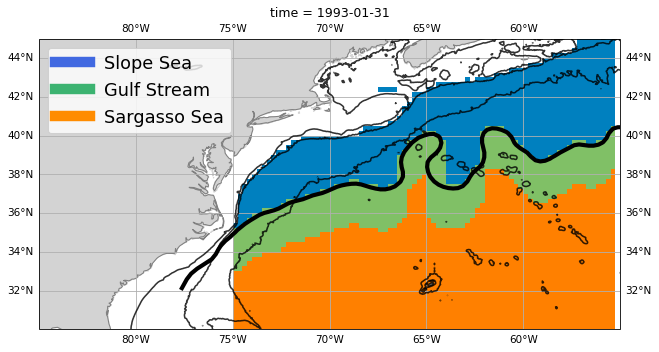

In [7]:
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"               plot_region_masks_example(geo_vels, bathy_nwa, fig_quality, title)                      "
"                                                                                                       "
" Input:                                                                                                "
"    geo_vels (DataArray)       : xarray DataArray of geostrophic velocities and masks                  "
"    bathy_nwa (DataArray)      : bathymetry file for plotting                                          "
"    fig_quality (Int)          : desired quality of the figure                                         "
"    title (String)             : desired title of the figure                                           "
"                                                                                                       "
" Output:                                                                                               "
"    * returns a map of the regional masks and Gulf Stream position for Jan. 1993                       "
"                                                                                                       "
"                                                                                                       "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

plot_region_masks_example(geo_vels, bathy_nwa, 75, 'Regional Masks');



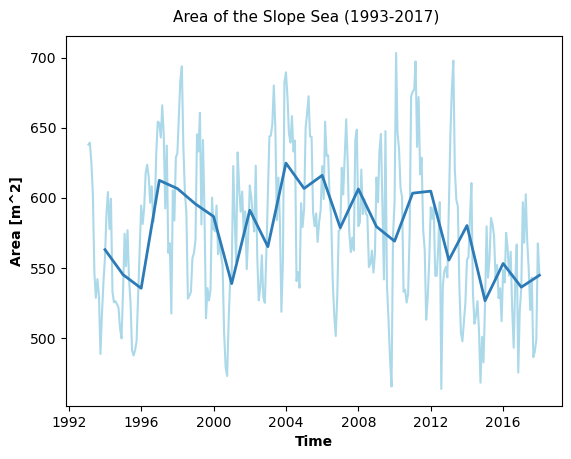

In [8]:
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"  plot_regionalArea(regionArea_monthly, regionArea_annual, region, fig_quality, c_monthly, c_annual)   "
"                                                                                                       "
" Input:                                                                                                "
"    regionArea_monthly (DataArray)   : xarray DataArray of monthly areas of region                     "
"    regionArea_annual (DataArray)    : xarray DataArray of annual areas of region                      "
"    region (String)                  : string of desired region to plot                                "
"    fig_quality (Int)                : desired quality of the figure                                   "
"    c_monthly (String)               : desired color for monthly timeseries                            " 
"    c_annual (String)                : desired color for annual timeseries                             " 
"                                                                                                       "
" Output:                                                                                               "
"    * returns a map of the regional masks and Gulf Stream position for Jan. 1993                       "
"                                                                                                       "
"                                                                                                       "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
 
# uncomment to plot a specific region: Slope Sea, Gulf Stream, or Sargasso
plot_regionalArea(slopeArea_monthly, slopeArea_annual, 'Slope Sea (1993-2017)', 100, '#abd9e9', '#2c7bb6');    
# plot_regionalArea(gsArea_monthly, gsArea_annual, 'Gulf Stream (1993-2017)', 100, '#E66F71', '#BC1618');
# plot_regionalArea(sagArea_monthly, sagArea_annual, 'Sargasso Sea (1993-2017)', 100, '#fdae61', '#EA7300');    
    

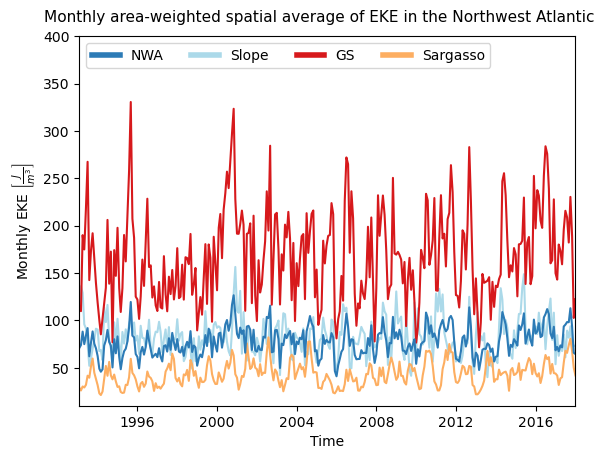

In [7]:
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"   plot_monthly_eke_ts(nwa_eke, slope_eke, gs_eke, sag_eke, title, fig_quality, ymin, ymax)            "
"                                                                                                       "
" Input:                                                                                                "
"    nwa_eke (DataArray)       : xarray DataArray NWA monthly EKE values                                "
"    slope_eke (DataArray)     : xarray DataArray Slope Sea monthly EKE values                          "
"    gs_eke (DataArray)        : xarray DataArray Gulf Stream monthly EKE values                        "
"    sag_eke (DataArray)       : xarray DataArray Sargasso Sea monthly EKE values                       "
"    title (String)            : title of the plot                                                      "
"    fig_quality (Int)         : desired quality of the figure                                          "
"    ymin (Int)                : set y-axis minimum value                                               "
"    ymax (Int)                : set y-axis maximum valu                                                "
"                                                                                                       "
" Output:                                                                                               "
"    * returns a timeseries plot of monthly EKE for each region (Slope, GS, Sargasso, NWA)              "
"                                                                                                       "
"                                                                                                       "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

    
plot_monthly_eke_ts(nwa_monthly_eke_ts, slope_monthly_eke_ts, gs_monthly_eke_ts, sag_monthly_eke_ts, 'Monthly area-weighted spatial average of EKE in the Northwest Atlantic', 100, 10, 400);


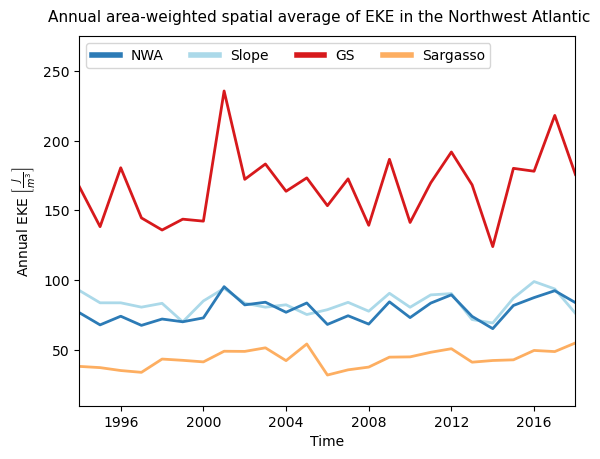

In [10]:
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"         plot_annual_eke_ts(nwa_eke, slope_eke, gs_eke, sag_eke, title, fig_quality, ymin, ymax)       "
" Input:                                                                                                "
"    nwa_eke (DataArray)       : xarray DataArray NWA annual EKE values                                 "
"    slope_eke (DataArray)     : xarray DataArray Slope Sea annual EKE values                           "
"    gs_eke (DataArray)        : xarray DataArray Gulf Stream annual EKE values                         "
"    sag_eke (DataArray)       : xarray DataArray Sargasso Sea annual EKE values                        "
"    title (String)            : title of the plot                                                      "
"    fig_quality (Int)         : desired quality of the figure                                          "
"    ymin (Int)                : set y-axis minimum value                                               "
"    ymax (Int)                : set y-axis maximum valu                                                "
"                                                                                                       "
" Output:                                                                                               "
"    * returns a timeseries plot of monthly EKE for each region (Slope, GS, Sargasso, NWA)              "
"                                                                                                       "
"                                                                                                       "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

plot_annual_eke_ts(nwa_annual_eke_ts, slope_annual_eke_ts, gs_annual_eke_ts, sag_annual_eke_ts, 'Annual area-weighted spatial average of EKE in the Northwest Atlantic', 100, 10, 275);


In [11]:
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"            Compute average EKE pre-2000 and post-2000 for monthly and annual timeseries                 "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
region, regionName = gs_annual_eke_ts, 'Gulf Stream'
# region, regionName = nwa_annual_eke_ts, 'Northwest Atlantic'
# region, regionName = slope_annual_eke_ts, 'Slope Sea'
# region, regionName = sag_annual_eke_ts, 'Sargasso Sea'

region_eke_pre2000_avg_annual = region.sel(time = slice(None, "2000")).mean("time")
region_eke_post2000_avg_annual = region.sel(time = slice("2000", None)).mean("time")

print(regionName+' Region')
print('Avg. annual EKE pre-2000 (1993–1999) = '+str(region_eke_pre2000_avg_annual.values))
print('Avg. annual EKE post-2000 (2000–2017) = '+str(region_eke_post2000_avg_annual.values))


Gulf Stream Region
Avg. annual EKE pre-2000 (1993–1999) = 161.03943913751246
Avg. annual EKE post-2000 (2000–2017) = 173.80047648400492


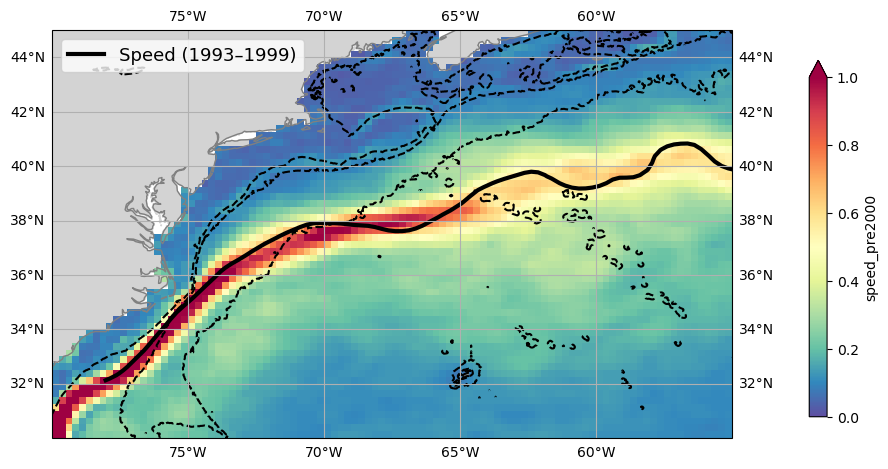

In [12]:
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"           plot_speed(speed_pre, speed_post, period, bathy_nwa, fig_quality, vmin_val, vmax_val)       "
" Input:                                                                                                "
"    speed_pre (DataArray)     : xarray DataArray of speed values (1993–1999) in the NWA, units [m/s]   "
"    speed_post (DataArray)    : xarray DataArray of speed values (2000–2017) in the NWA, units [m/s]   "
"    period (String)           : String indicating period, e.g. 'pre', 'post', or 'difference'          "
"    bathy_nwa (DataArray)     : xarray DataArray bathymetry of Northwest Atlantic                      "
"    fig_quality (Int)         : desired quality of the figure                                          "
"    vmin_val (Int)            : set minimum value for color shading                                    "
"    vmax_val (Int)            : set maximum value for color shading                                    "
"                                                                                                       "
" Output:                                                                                               "
"    * returns a timeseries plot of monthly EKE for each region (Slope, GS, Sargasso, NWA)              "
"                                                                                                       "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

plot_speed(ga["speed_pre2000"], ga["speed_post2000"], 'pre', bathy_nwa, 100, 0, 1);
# plot_speed(ga["speed_pre2000"], ga["speed_post2000"], 'post', bathy_nwa, 100, 0, 1);
# plot_speed(ga["speed_pre2000"], ga["speed_post2000"], 'diff', bathy_nwa, 100, -0.15, 0.15);


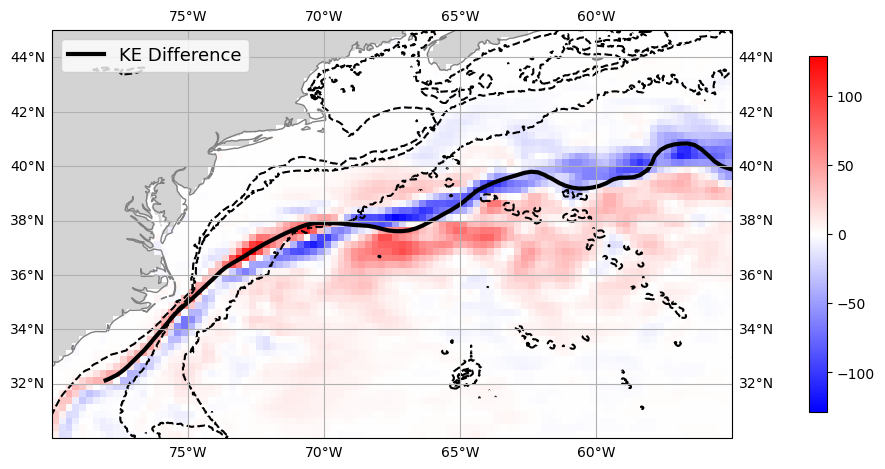

In [13]:
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"           plot_ke(ke_pre, ke_post, period, bathy_nwa, fig_quality, vmin_val, vmax_val)                "
" Input:                                                                                                "
"    ke_pre (DataArray)        : xarray DataArray of KE values (1993–1999) in the NWA, units [J/m^3]    "
"    ke_post (DataArray)       : xarray DataArray of KE values (2000–2017) in the NWA, units [J/m^3]    "
"    period (String)           : String indicating period, e.g. 'pre', 'post', or 'difference'          "
"    bathy_nwa (DataArray)     : xarray DataArray bathymetry of Northwest Atlantic                      "
"    fig_quality (Int)         : desired quality of the figure                                          "
"    vmin_val (Int)            : set minimum value for color shading                                    "
"    vmax_val (Int)            : set maximum value for color shading                                    "
"                                                                                                       "
" Output:                                                                                               "
"    * returns a timeseries plot of monthly EKE for each region (Slope, GS, Sargasso, NWA)              "
"                                                                                                       "
"                                                                                                       "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

# plot_ke(ga["KE_pre2000"], ga["KE_post2000"], 'pre', bathy_nwa, 100, 0, 500);
# plot_ke(ga["KE_pre2000"], ga["KE_post2000"], 'post', bathy_nwa, 100, 0, 500);
plot_ke(ga["KE_pre2000"], ga["KE_post2000"], 'diff', bathy_nwa, 100, -129, 129);



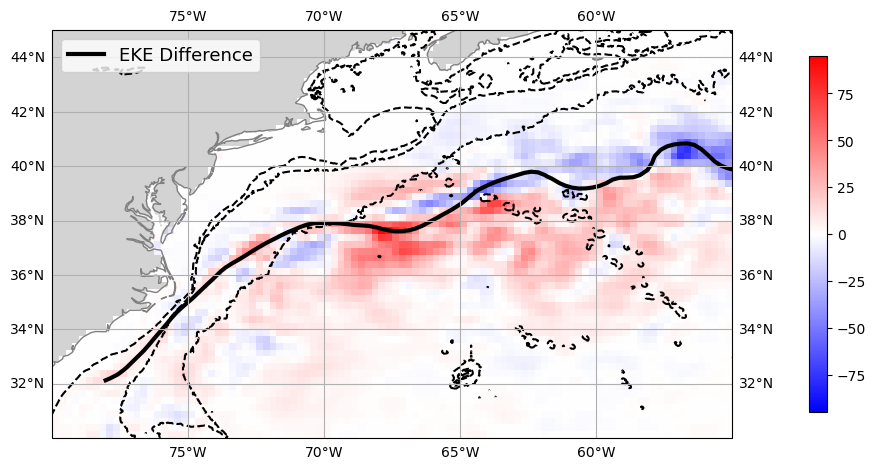

In [14]:
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"              plot_eke(eke_pre, eke_post, period, bathy_nwa fig_quality, vmin_val, vmax_val)           "
" Input:                                                                                                "
"    eke_pre (DataArray)       : xarray DataArray of EKE values (1993–1999) in the NWA, units [J/m^3]   "
"    eke_post (DataArray)      : xarray DataArray of EKE values (2000–2017) in the NWA, units [J/m^3]   "
"    period (String)           : String indicating period, e.g. 'pre', 'post', or 'difference'          "
"    bathy_nwa (DataArray)     : xarray DataArray bathymetry of Northwest Atlantic                      "
"    fig_quality (Int)         : desired quality of the figure                                          "
"    vmin_val (Int)            : set minimum value for color shading                                    "
"    vmax_val (Int)            : set maximum value for color shading                                    "
"                                                                                                       "
" Output:                                                                                               "
"    * returns a timeseries plot of monthly EKE for each region (Slope, GS, Sargasso, NWA)              "
"                                                                                                       "
"                                                                                                       "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

# plot_eke(ga["EKE_pre2000"], ga["EKE_post2000"], 'pre', bathy_nwa, 100, 0, 265);
# plot_eke(ga["EKE_pre2000"], ga["EKE_post2000"], 'post', bathy_nwa, 100, 0, 265);
plot_eke(ga["EKE_pre2000"], ga["EKE_post2000"], 'diff', bathy_nwa, 100, -95, 95);

